In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ravishankarbhati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv("../Data/train_F3WbcTw.csv")

In [5]:
df.shape

(5279, 4)

In [6]:
df.columns

Index(['unique_hash', 'text', 'drug', 'sentiment'], dtype='object')

In [7]:
df.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [8]:
df.drop(columns="unique_hash",axis=1,inplace=True)

In [9]:
df.shape

(5279, 3)

In [10]:
df.columns

Index(['text', 'drug', 'sentiment'], dtype='object')

### makethe text to lowercase for all

In [11]:
df["text"] = df["text"].apply(lambda x:x.lower())

In [12]:
#from textblob import TextBlob

In [13]:
df.head()

,text,drug,sentiment
0,autoimmune diseases tend to come in clusters. ...,gilenya,2
1,i can completely understand why you’d want to ...,gilenya,2
2,interesting that it only targets s1p-1/5 recep...,fingolimod,2
3,"very interesting, grand merci. now i wonder wh...",ocrevus,2
4,"hi everybody, my latest mri results for brain ...",gilenya,1


###  get the list of stop words and lemmatize the words

In [14]:
stopwords = set(stopwords.words("english"))

In [15]:
len(stopwords)

179

In [16]:
#stopwords

In [17]:
word_lematizer = WordNetLemmatizer()

In [18]:
len(df[ df.sentiment == 0])

617

In [19]:
len(df[ df.sentiment == 1])

837

In [20]:
len(df[ df.sentiment == 2])

3825

In [21]:
len(df.drug.unique())

102

In [22]:
neutral_reviews = df[ df.sentiment == 2].sample(n=617)

In [23]:
neutral_reviews.head()

,text,drug,sentiment
4473,@hels – i suspect they made the suggestion the...,ocrelizumab,2
3478,my story started in april 2013 with a very bad...,bevacizumab,2
4559,"been a while!!! how have you been? liz, 27 its...",remicade,2
787,"durham, n.c.--(business wire)--jan 17, 2019--a...",dexamethasone,2
3279,"immune checkpoint proteins on immune t cells, ...",osimertinib,2


In [24]:
len(neutral_reviews["drug"].value_counts())

60

In [25]:
len(df["drug"].unique())

102

In [26]:
len(df[df.sentiment == 0]["drug"].value_counts())

57

In [27]:
len(df[df.sentiment == 1]["drug"].value_counts())

54

In [28]:
len(df[df.sentiment == 2]["drug"].value_counts())

97

In [29]:
df.columns

Index(['text', 'drug', 'sentiment'], dtype='object')

In [30]:
neutral_rev= pd.DataFrame(columns=['text', 'drug', 'sentiment'])

In [31]:
neutral_rev

,text,drug,sentiment


In [32]:
for dg in df.drug.unique() :
    neu_review = df[ (df['sentiment']==2) & (df['drug']== dg)]
    if(len(neu_review))>15 :
        neu_sample = neu_review.sample(n=15)
    else :
        neu_sample = neu_review
    #print(neu_sample)
    neutral_rev = neutral_rev.append(neu_sample)
    #print(neutral_rev)

In [33]:
neutral_rev.shape

(803, 3)

In [34]:
( (neutral_rev.drug.value_counts() >=6)).value_counts()

True     52
False    45
Name: drug, dtype: int64

In [35]:
#df.drug.value_counts().sort_values(ascending=False)

In [36]:
drug_value_counts = df.drug.value_counts().tolist()

In [37]:
np.median(drug_value_counts)

7.0

In [38]:
np.std(drug_value_counts)

116.44483977946336

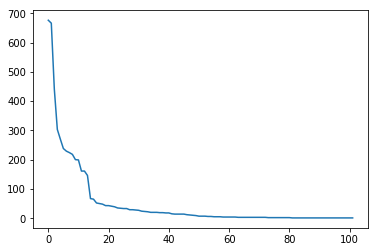

In [39]:
plt.plot(drug_value_counts)

In [40]:
np.percentile(drug_value_counts,75)

33.0

In [41]:
drug_value_more = ( ( df.drug.value_counts() > int(np.percentile(drug_value_counts,75)) )==True ).keys().tolist()

In [42]:
neutral_rev.shape

(803, 3)

In [43]:
pos_rev = df[ df.sentiment==0 ]
pos_rev.shape

(617, 3)

In [44]:
neg_rev= df[ df.sentiment==1]
neg_rev.shape

(837, 3)

In [45]:
neutral_rev.head(2)

,text,drug,sentiment
5233,"hi tia, i was diagnosed with rrms in march of ...",gilenya,2
3744,"pardon me for saying it like this, but damn gi...",gilenya,2


In [46]:
neu_rev= neutral_rev

In [47]:
pos_rev.head(2)

,text,drug,sentiment
6,reply posted for jesszidek. hi jess sorry to r...,humira,0
28,"last updated: january 01, 2017. share | comme...",ocrelizumab,0


In [48]:
neg_rev.head(2)

,text,drug,sentiment
4,"hi everybody, my latest mri results for brain ...",gilenya,1
8,why do you think that fingolimod was such a mi...,fingolimod,1


##  data pre processing done

## taking the test data given an dformatting it to run the model on it 

In [49]:
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

In [50]:
def GetTokens(text):
    
    tokens = nltk.tokenize.word_tokenize(text)
    tokens = [t for t in tokens if (len(t)>2)]
    #tokens = [t for t in tokens if (hasNumbers(t)==False) ]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [ word_lematizer.lemmatize(t) for t in tokens]
    
    return tokens

current_index=0
pos_tokens = []
neg_tokens = []
neu_tokens = []
word_index_map = {}

pos_tokenized = []
neg_tokenized = []
neu_tokenized = []

for review in pos_rev.text :
    tokens = GetTokens(review)
    pos_tokenized.append(tokens)
    for token in tokens:
        if(token not in word_index_map) :
            word_index_map[token]=current_index
            current_index += 1

for review in neg_rev.text :
    tokens = GetTokens(review)
    neg_tokenized.append(tokens)
    for token in tokens:
        if(token not in word_index_map) :
            word_index_map[token]=current_index
            current_index += 1

for review in neu_rev.text :
    tokens = GetTokens(review)
    neu_tokenized.append(tokens)
    for token in tokens:
        if(token not in word_index_map) :
            word_index_map[token]=current_index
            current_index += 1

In [115]:
#datatest = np.zeros( ( len(pos_tokenized)+len(neg_tokenized)+len(neu_tokenized), len(word_index_map)) )

In [116]:
#len(word_index_map)

In [51]:
data = np.zeros( ( len(pos_tokenized)+len(neg_tokenized)+len(neu_tokenized), len(word_index_map)+1 ) )

In [52]:
data.shape

(2257, 32749)

In [53]:
def TokenToVectors(tokens,label) :
    x= np.zeros(len(word_index_map) +1)
    
    for token in tokens:
        index = word_index_map[token]
        x[index] +=1
    
    x = x/x.sum()
    x[-1]=label
    
    return x

i =0

for tokens in pos_tokenized :
    x_row = TokenToVectors(tokens,0)
    data[i,:]= x_row
    i += 1

for tokens in neg_tokenized :
    x_row = TokenToVectors(tokens,1)
    data[i,:]= x_row
    i += 1

for tokens in neu_tokenized :
    x_row = TokenToVectors(tokens,2)
    data[i,:]= x_row
    i += 1

In [54]:
data.shape

(2257, 32749)

### split the data and create models

In [55]:
np.random.shuffle(data)

In [56]:
total_len=int(len(data) * 0.8)

In [57]:
total_len

1805

In [58]:
X = data[: , :-1]
Y = data[:,-1]

X_train = X[0:total_len , :]
Y_train = Y[0:total_len]

X_test = X[total_len : , :]
Y_test = Y[total_len:]

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logis_model = LogisticRegression()

In [61]:
logis_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
logis_model.score(X,Y)

0.5569339831634914

In [63]:
from sklearn.ensemble import RandomForestClassifier

randomforest_model = RandomForestClassifier(n_estimators=10)

In [64]:
randomforest_model.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
randomforest_model.score(X,Y)

0.9853788214443953

In [66]:
import lightgbm as lgb

In [67]:
lgb_train = lgb.Dataset(X,Y)
#lgb_eval = lgb.Dataset(, Y, reference=lgb_train)
params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['num_class'] = 3
params['metric'] = 'multi_logloss'
params['sub_feature'] = 0.8
params['num_leaves'] = 60
#params['min_data'] = 500
params['bagging_fraction'] = 0.6
params['bagging_freq'] = 3

#lgb_model = lgb.train(params,lgb_train,num_boost_round=1000)
lgb_cv = lgb.cv(params, lgb_train, num_boost_round=1000, nfold=5, shuffle=True, stratified=True, verbose_eval=20, early_stopping_rounds=100)

nround = lgb_cv['multi_logloss-mean'].index(np.min(lgb_cv['multi_logloss-mean']))
print(nround)

model = lgb.train(params, lgb_train, num_boost_round=nround)

[20]	cv_agg's multi_logloss: 0.946343 + 0.00731558
[40]	cv_agg's multi_logloss: 0.890214 + 0.0154192
[60]	cv_agg's multi_logloss: 0.863366 + 0.0213643
[80]	cv_agg's multi_logloss: 0.855946 + 0.0240862
[100]	cv_agg's multi_logloss: 0.854794 + 0.0252376
[120]	cv_agg's multi_logloss: 0.85837 + 0.0293523
[140]	cv_agg's multi_logloss: 0.863364 + 0.0330091
[160]	cv_agg's multi_logloss: 0.87374 + 0.0365714
[180]	cv_agg's multi_logloss: 0.885819 + 0.0411872
93


## import the test data and run the model on it

In [68]:
testdata= pd.read_csv("../Data/test_tOlRoBf.csv")

In [69]:
testdata.head()

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara


In [70]:
testdata["text"] = testdata["text"].apply(lambda x:x.lower())

In [71]:
testdata.shape

(2924, 3)

In [72]:
#samplesubmission = pd.read_csv("../Data/sample_submission_i5xnIZD.csv")

In [73]:
#samplesubmission.head()

In [74]:
current_index=0
pos_tokens = []
neg_tokens = []
neu_tokens = []
word_index_map_test = {}

review_tokenized = []

for review in testdata.text :
    tokens = GetTokens(review)
    
    for token in tokens:
        if(token not in word_index_map) :
            tokens.remove(token)
    
    review_tokenized.append(tokens)
    

In [75]:
datatest = np.zeros( ( len(review_tokenized), len(word_index_map)) )

In [76]:
datatest.shape

(2924, 32748)

In [77]:
def TokenToVectorsTest(tokens) :
    x= np.zeros(len(word_index_map))
    
    for token in tokens:
        if(token in word_index_map):
            index = word_index_map[token]
            x[index] +=1
    
    x = x/x.sum()
    #x[-1]=label
    
    return x

In [78]:
review_tokenized[0]

['256', 'previously', 'stable', 'natalizumab', 'switching', 'fingolimod']

In [79]:
i =0

for tokens in review_tokenized :
    #print(tokens)
    x_row = TokenToVectorsTest(tokens)
    datatest[i,:]= x_row
    i += 1


In [80]:
#ypreds = randomforest_model.predict(datatest)

In [81]:
ypreds1 = model.predict(datatest)

In [82]:
ypreds = []

for x in ypreds1:
    ypreds.append(np.argmax(x))

In [83]:
from sklearn.metrics import f1_score

In [85]:
len(ypreds)

2924

In [86]:
testdata["sentiment"] = [ y for y in ypreds]

In [87]:
testdata.head()

,unique_hash,text,drug,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod,1
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,on fingolimod and have been since december 201...,fingolimod,0
2,50b6d851bcff4f35afe354937949e9948975adf7,apparently it's shingles! :-/ i do have a few ...,humira,1
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,if the docetaxel doing once a week x3 weeks th...,tagrisso,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"cc, stelara worked in a matter of days for me....",stelara,1


In [88]:
final_submission_file = testdata[["unique_hash","sentiment"]]

In [89]:
final_submission_file.shape

(2924, 2)

In [90]:
final_submission_file.to_csv("submission.csv",index=False)

# <red><b><h2> try removing urls, creating category for integers/numbers</h2></b></red>

In [91]:
import re

In [92]:
#keys= (valdf.sum()).keys().tolist()

In [108]:
count=0
for token,index in word_index_map.items():
    if (re.match(r'[^\w]',token)):
        print(token)
        count +=1

print(count)

//www.crohnscolitisfoundation.org/assets/pdfs/understanding-ibd-meds-nov.pdf
-engineered
-medicare
'll
*not
've
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
...
//cancergrace.org/blog/jim-and-lisa
//www.ncbi.nlm.nih.gov/pubmed/28391420
//shift.ms/msreporters
//www.facebook.com/shift.ms/
//www.instagram.com/shiftdotms/
//twitter.com/shiftms
//insidemystory.com/
//www.mstrust.org.uk/a-z/ocrelizumab
-active
^_^
're
=24
//www.cancer.gov/types/colorectal/patient/colon-treatment-pdq
//www.ncbi.nlm.nih.gov/pmc/articles/pmc5401676/
//cancergrace.org/lung/2017/09/28/targeted-therapies-in-lung-cancer-patient-forum-2017-presentations-and-handouts/
//www.mstrust.org.uk/about-ms/ms-treatments/ms-decisions-aid
//www.gene.com/media/press-releases/14773/2019-01-16/fda-accepts-genentechs-supplemental-biol
+ive
-dr.
//multiple-sclerosis-research.blogspot.com/2014/05/clinic-speak-swi
'not
//www.cghjournal.org/article/s1542-3565
'05
'15
'10
-luxury
-sheerling
-cotton
-hot
-alexa
-try
-shower
-cooling
-squatty
.0

In [110]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ravishankarbhati/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [117]:
nltk.pos_tag("Ravi is awesome. accumulation-presence He is going to Jail. ≤0.03 .375 // //multiple-sclerosis-research.blogspot.com/2015/09/clinicspeak-is-r".split())

[('Ravi', 'NNP'),
 ('is', 'VBZ'),
 ('awesome.', 'JJ'),
 ('accumulation-presence', 'NN'),
 ('He', 'PRP'),
 ('is', 'VBZ'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('Jail.', 'NNP'),
 ('≤0.03', 'NNP'),
 ('.375', 'NNP'),
 ('//', 'NNP'),
 ('//multiple-sclerosis-research.blogspot.com/2015/09/clinicspeak-is-r', 'NN')]